<a href="https://colab.research.google.com/github/riyachiraniya/CreditCard_Fraud_Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary libraries
from keras.layers import Input, Dense
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ensure inline plotting
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/archive/creditcard.csv')

In [ ]:
# Display the first few rows
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

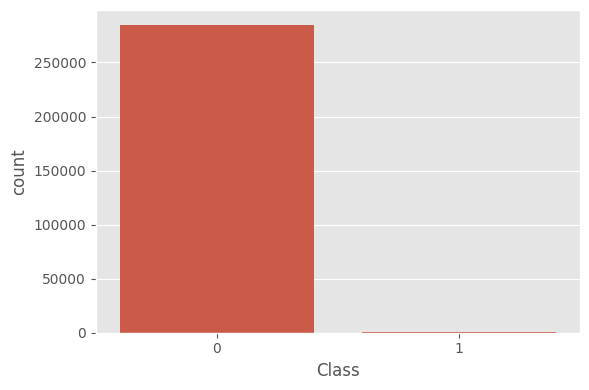

In [ ]:
# Plot the class distribution
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='Class', data=df, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers in the 'Amount' column
df = df[df['Amount'] <= 8000]

In [ ]:
# Print class distribution and percentage of fraudulent activity
print(df['Class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((df[df['Class'] == 1].shape[0] / df.shape[0])))

Class
0    284303
1       492
Name: count, dtype: int64

Percentage of fraudulent activity: 0.17%


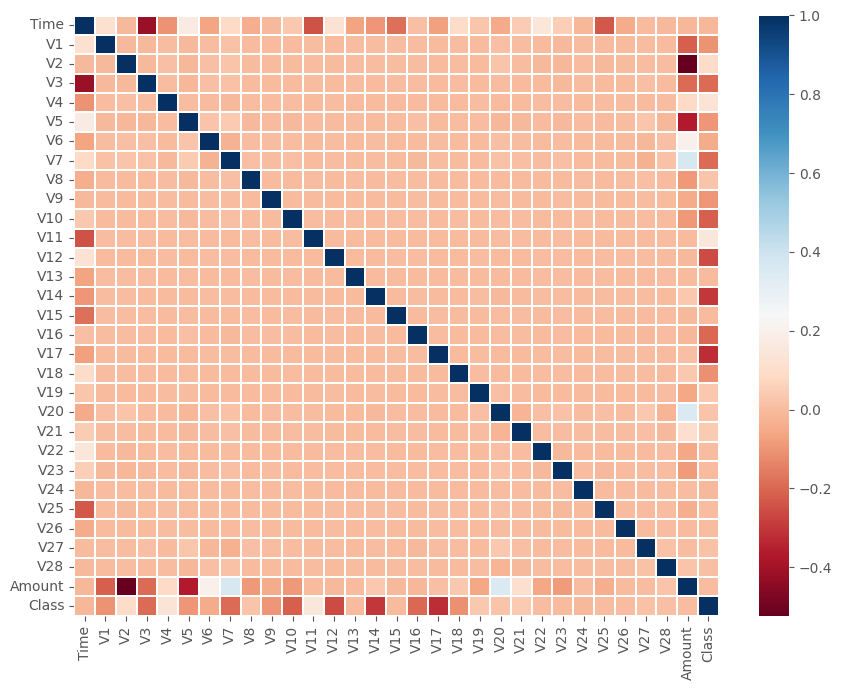

In [ ]:
# Correlation heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
# Sample non-fraudulent transactions and append all fraudulent transactions
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]
print('Non-Fraudulent:', len(non_fraud), 'Fraudulent:', len(fraud))

Non-Fraudulent: 284303 Fraudulent: 492


In [ ]:
# Combine and shuffle the dataset
df_2 = pd.concat([non_fraud, fraud]).sample(frac=1, random_state=42).reset_index(drop=True)
x = df_2.drop(['Class'], axis=1).values
y = df_2['Class'].values

In [ ]:
# Scale the features
x_scale = preprocessing.MinMaxScaler().fit_transform(x)

In [ ]:
# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_scale, y)

In [ ]:
# Train-test split
train_x, val_x, train_y, val_y = train_test_split(x_res, y_res, test_size=0.25, random_state=42)

In [ ]:
# Define and train a Logistic Regression model
log_clf = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
log_clf.fit(train_x, train_y)
pred_y_log = log_clf.predict(val_x)

In [ ]:
# Classification report and confusion matrix for Logistic Regression
print("Logistic Regression Report:")
print(classification_report(val_y, pred_y_log))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     71109
           1       0.98      0.92      0.95     71043

    accuracy                           0.95    142152
   macro avg       0.95      0.95      0.95    142152
weighted avg       0.95      0.95      0.95    142152



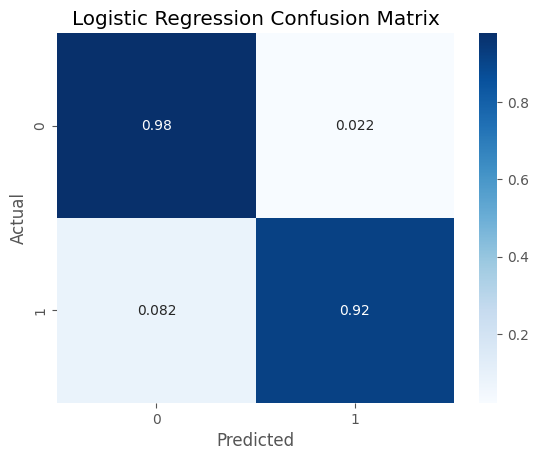

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(val_y, pred_y_log, normalize='true'), annot=True, ax=ax, cmap='Blues')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
